In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
filepath = 'https://docs.google.com/spreadsheets/d/1_B0reSRNs5_Se-5FPUtUB6AmjT511Ey2e6BjzrD4nY4/export?format=csv&gid=0'
df = pd.read_csv(filepath)

In [3]:
df = df.drop(['link' , 'Area' , 'Parking','Storage' ] , axis = 1)
df

,Rent,Deposit,DoB,Meterage,FloorNum,District,NoB,Elevator,Balcony
0,25000000,450000000,1404,130,2,1,3,1,0
1,8000000,200000000,1391,75,2,4,2,1,0
2,3000000,400000000,1385,80,3,2,2,0,0
3,6000000,150000000,1395,100,1,2,1,0,0
4,7500000,320000000,1380,116,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...
120,3000000,80000000,1377,70,1,3,1,0,1
121,6000000,300000000,1392,110,1,4,2,0,0
122,25000000,1000000000,1395,106,4,1,2,1,1
123,9000000,300000000,1385,120,1,5,2,0,0


In [16]:
quant_cols = ['Rent', 'Deposit', 'Meterage' ]


In [4]:
df['DoB'] = df['DoB'].apply(lambda x: f"{int(x // 10 * 10)}s")
print(df['DoB'].value_counts())

DoB
1390s    70
1400s    28
1380s    24
1370s     3
Name: count, dtype: int64


In [5]:
def Decade(x):
    if x in ['1370s' ,'1380s' ]:
        return 'Before 1390'
    else:
        return x
df['DoB'] = df['DoB'].apply(Decade)
print(df['DoB'].value_counts())

DoB
1390s          70
1400s          28
Before 1390    27
Name: count, dtype: int64


In [6]:
df = pd.get_dummies(df , columns=['FloorNum','District','NoB' , 'Elevator' , 'DoB' , 'Balcony'] , drop_first=True)

In [7]:
dummy_cols = [ 'FloorNum_2', 'FloorNum_3',
       'FloorNum_4', 'FloorNum_5', 'District_2', 'District_3', 'District_4',
       'District_5', 'NoB_2', 'NoB_3', 'NoB_4', 'Elevator_1', 'DoB_1400s',
       'DoB_Before 1390' , 'Balcony_1']
selected_data = df[dummy_cols]
df[dummy_cols] = df[dummy_cols].astype(int)
df.head()

,Rent,Deposit,Meterage,FloorNum_2,FloorNum_3,FloorNum_4,FloorNum_5,District_2,District_3,District_4,District_5,NoB_2,NoB_3,NoB_4,Elevator_1,DoB_1400s,DoB_Before 1390,Balcony_1
0,25000000,450000000,130,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1,8000000,200000000,75,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
2,3000000,400000000,80,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
3,6000000,150000000,100,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,7500000,320000000,116,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [8]:
scaler = MinMaxScaler()
df[['Meterage' , 'Rent','Deposit']] = scaler.fit_transform(df[[ 'Meterage','Rent' , 'Deposit']])

In [9]:
df['nRent'] = df['Rent'] + df['Deposit']

In [10]:
df  = df.drop_duplicates()

In [11]:
df.shape

(122, 19)

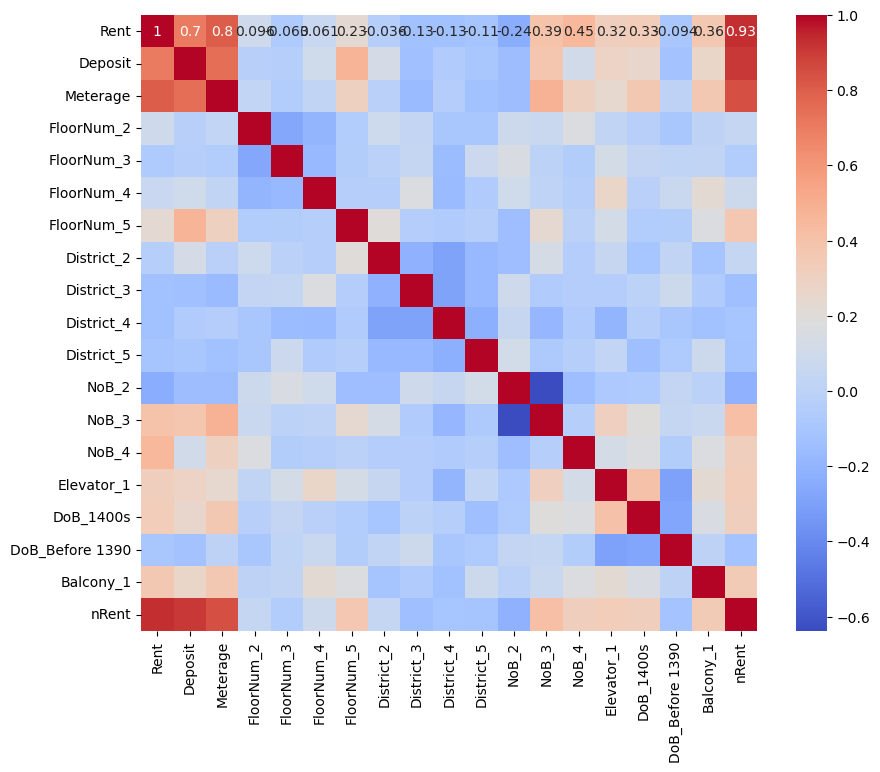

In [12]:
corr_mat = df.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr_mat , annot = True , cmap='coolwarm' , square = True  )
plt.show()

In [13]:
import joblib
joblib.dump(dummy_cols, 'dummy_columns.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [14]:
df.to_csv('DataPre' , index=False)

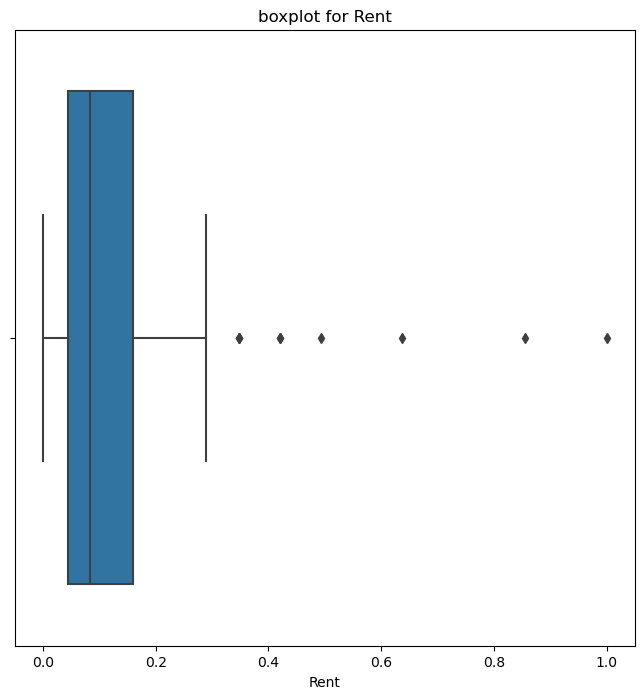

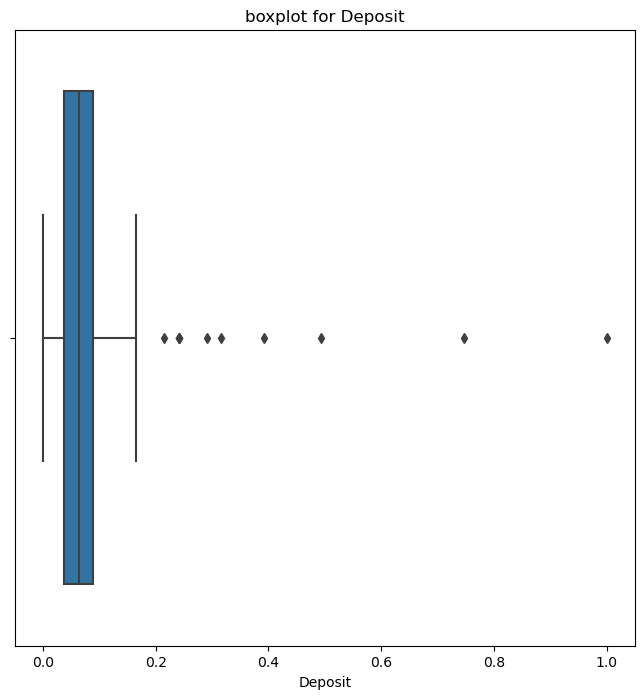

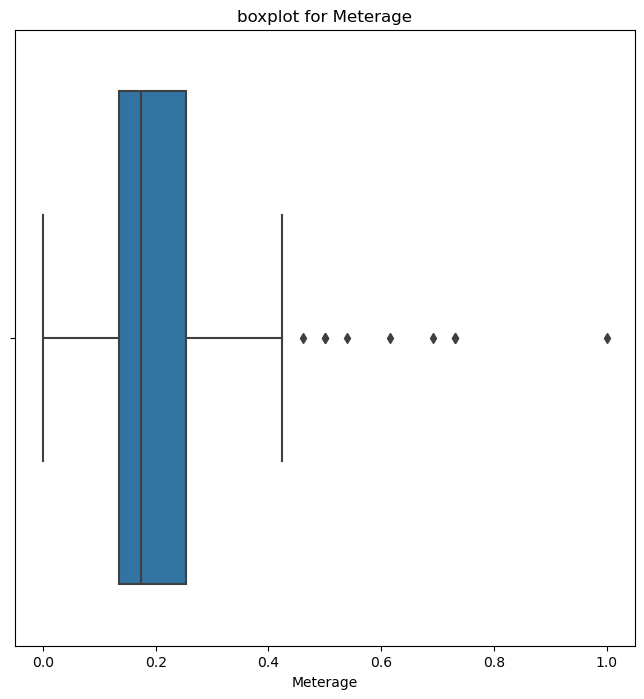

In [17]:
for col in quant_cols:
    fig = plt.figure(figsize=(8,8))
    sns.boxplot(x=df[col])
    plt.title(f'boxplot for {col}')
    plt.show()

In [20]:
df['nRent']

0      0.449092
1      0.139424
2      0.117593
3      0.097780
4      0.162557
         ...   
120    0.036580
121    0.135755
122    0.588332
123    0.179233
124    0.097780
Name: nRent, Length: 122, dtype: float64

In [24]:
# از بررسی باقی مانده ها متوجه شدم که داده های من از توزیع نرمال پیروی نمی کنه به همین دلیل دارم از کتابخونه باکس کاکس استفاده می کنم تا بهترین ترنسفورمیشن رو برای ستون
# تارگت داشته باشم
from scipy.stats import boxcox
y_transformed , lambda_ = boxcox(df['nRent'])
print(f"Optimal λ: {lambda_:.3f}") 

Optimal λ: -0.292
